In [ ]:
# prompt: import heart deases dataset

import pandas as pd

# Read the CSV file containing the heart disease data
df = pd.read_csv('heart.csv')

# Print the first few rows of the DataFrame
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
from sklearn.model_selection import train_test_split

X = df[["age","sex", "cp_0",	"cp_1",	"cp_2",	"cp_3", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
df = pd.get_dummies(df, columns=['cp'], prefix='cp')
df

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3
0,0.708333,1,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0.00,1,1,0,0,0,1
1,0.166667,1,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0.00,2,1,0,0,1,0
2,0.250000,0,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0.00,2,1,0,1,0,0
3,0.562500,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0.00,2,1,0,1,0,0
4,0.583333,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0.00,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0,0.433962,0.262557,0,1,0.396947,1,0.032258,1,0.00,3,0,1,0,0,0
299,0.333333,1,0.150943,0.315068,0,1,0.465649,0,0.193548,1,0.00,3,0,0,0,0,1
300,0.812500,1,0.471698,0.152968,1,1,0.534351,0,0.548387,1,0.50,3,0,1,0,0,0
301,0.583333,1,0.339623,0.011416,0,1,0.335878,1,0.193548,1,0.25,3,0,1,0,0,0


In [ ]:
import numpy as np
def createOneHot(y):
    ret_ = np.zeros((y.shape[0], 2))
    for i in range(len(y)):
        ret_[i, y[i]] = 1
    return ret_

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_normalize = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']  # Add all numeric columns here

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [ ]:

from scipy.special import softmax
from sklearn.metrics import precision_score, recall_score
def relu(x):
    return np.maximum(0, x)

def sparse_categorical_crossentropy(y_true, y_pred):
    # Clip predicted values to avoid log(0) errors
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    # Calculate cross-entropy loss
    N = y_pred.shape[0]
    cross_entropy_loss = -np.sum(y_true * np.log(y_pred)) / N

    return cross_entropy_loss

def sparse_categorical_crossentropy_gradient(y_true, y_pred):
    # Number of samples
    N = y_pred.shape[0]

    # Compute gradient
    grad = (y_pred - y_true) / N

    return grad

def relu_gradient(x):
    return (x > 0).astype(int)

def accuracy(y_true, y_pred):
    m = y_true.shape[0]  # number of examples

    y_pred_classes = np.argmax(y_pred, axis=1)
    # Convert probabilities to class labels

    # Convert one-hot encoded true labels to class labels
    y_true_classes = np.argmax(y_true, axis=1)

    # Compute accuracy
    correct_predictions = np.sum(y_true_classes == y_pred_classes)
    acc = correct_predictions / m
    print("precision_score: ", precision_score(y_pred=y_pred_classes, y_true=y_true_classes))
    print("recall_score: ", recall_score(y_pred=y_pred_classes, y_true=y_true_classes))
    return acc


def train(x_train, y_train, x_test, y_test, learning_rate, epoch=10, batch_size=64):
    losses = []
    W1 = np.random.rand(128, 16)
    b1 = np.random.rand(128)

    W2 = np.random.rand(2, 128)
    b2 = np.random.rand(2)
    for i in range(epoch):
        indices = np.random.randint(0, x_train.shape[0], batch_size)
        x_batch = x_train[indices]
        y_batch = y_train[indices]
        if i ==1:
            print(x_batch.shape)
            print(W1.shape)
            print(W2.shape)
        # first layer
        Z1 = np.dot(W1, x_batch.T).T + b1
        A1 = relu(Z1)
        Z2 = np.dot(W2, A1.T).T + b2
        A2 = softmax(Z2, axis = 1)
        if i == 400:
            learning_rate = 0.1
        losses.append(sparse_categorical_crossentropy(A2, y_batch))
        delta2 = sparse_categorical_crossentropy_gradient(y_batch, A2)

        dW2 = np.dot(delta2.T, A1)
        db2 = delta2
        delta1 = np.dot(delta2, W2) * relu_gradient(Z1)
        dW1 = np.dot(delta1.T, x_batch)
        db1 = delta1

        # weight update
        W2 -= learning_rate * dW2
        b2 -= learning_rate * np.sum(db2, axis = 0)
        W1 -= learning_rate * dW1
        b1 -= learning_rate * np.sum(db1, axis = 0)
    Z1 = np.dot(W1, x_test.T).T + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1.T).T + b2
    A2 = softmax(Z2, axis = 1)
    print("Accuracy on test set: ", accuracy(y_test, A2))
    return losses
losses = train(X_train.to_numpy(), createOneHot(np.array(y_train)), X_test.to_numpy(), createOneHot(np.array(y_test)), 0.2, 800, 64)

(64, 16)
(128, 16)
(2, 128)
precision_score:  0.8301886792452831
recall_score:  0.88
Accuracy on test set:  0.8351648351648352


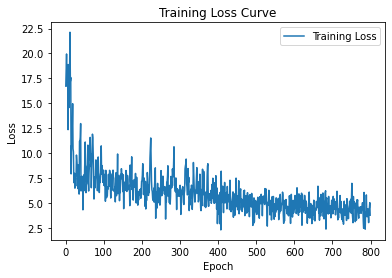

In [ ]:
import matplotlib.pyplot as plt

def plot_losses(losses):
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.legend()
    plt.show()
plot_losses(losses)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

class DecisionTree:
    def __init__(self, max_depth=4):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def predict(self, X):
        return [self._predict_tree(sample, self.tree) for sample in X]

    def _entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def _split_data(self, X, y, feature_index, threshold):
        left_indices = X[:, feature_index] < threshold
        right_indices = ~left_indices
        left_data, right_data = X[left_indices], X[right_indices]
        left_labels, right_labels = y[left_indices], y[right_indices]
        return left_data, right_data, left_labels, right_labels

    def _information_gain(self, y, left_y, right_y):
        parent_entropy = self._entropy(y)
        left_entropy = self._entropy(left_y)
        right_entropy = self._entropy(right_y)
        n = len(y)
        left_weight = len(left_y) / n
        right_weight = len(right_y) / n
        gain = parent_entropy - (left_weight * left_entropy + right_weight * right_entropy)
        return gain

    def _find_best_split(self, X, y):
        best_gain = 0
        best_feature = None
        best_threshold = None
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_data, right_data, left_labels, right_labels = self._split_data(X, y, feature_index, threshold)
                gain = self._information_gain(y, left_labels, right_labels)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_index
                    best_threshold = threshold
        return best_feature, best_threshold

    def _build_tree(self, X, y, depth=0):
        if depth >= self.max_depth or len(np.unique(y)) == 1:
            return np.bincount(y).argmax()
        best_feature, best_threshold = self._find_best_split(X, y)
        if best_feature is None:
            return np.bincount(y).argmax()
        left_data, right_data, left_labels, right_labels = self._split_data(X, y, best_feature, best_threshold)
        left_subtree = self._build_tree(left_data, left_labels, depth + 1)
        right_subtree = self._build_tree(right_data, right_labels, depth + 1)
        return (best_feature, best_threshold, left_subtree, right_subtree)

    def _predict_tree(self, sample, tree):
        if isinstance(tree, np.int64) or isinstance(tree, int):
            return tree
        else:
            feature, threshold, left_subtree, right_subtree = tree
            if sample[feature] < threshold:
                return self._predict_tree(sample, left_subtree)
            else:
                return self._predict_tree(sample, right_subtree)

def decision_tree(X_train, y_train, X_test):
    model = DecisionTree()
    model.fit(X_train, y_train)
    return model.predict(X_test)


X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()

predictions = decision_tree(X_train_np, y_train_np, X_test_np)

print("accuracy_score", accuracy_score(predictions, y_test))
print("precision_score", precision_score(predictions, y_test))
print("recall_score", recall_score(predictions, y_test))

accuracy_score 0.7252747252747253
precision_score 0.64
recall_score 0.8205128205128205


# 2 Questions

1.
   1. 1. inputs are  (64(Batch_size), 16)
   1. 2. parameter1 (128, 16)
   1. 3. parameter2 (2, 128)
   1. 4. How will you integrate the concept of mini-batch training ?
    I will just choose random indexes at each epoch to get batch, and update parameters on this gradient.

How should you check whether or not you should keep training your model ?

`    We need to check loss, if loss doesn't change over long perioud(epochs) it means that we are on local minimum`

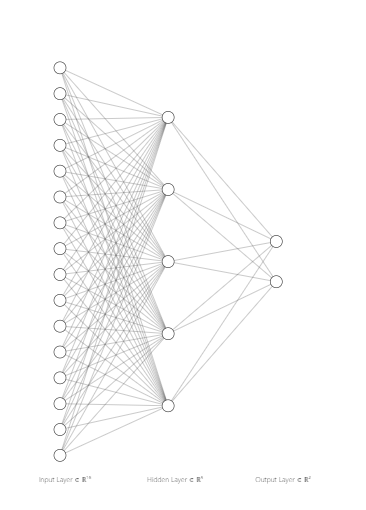

`In the case of predicting the risk of heart disease in patients, I would prefer that the model is more sensitive. A highly sensitive model ensures that most patients who are at risk of heart disease are correctly identified, minimizing the chances of missing individuals who need medical intervention.
`

# 4 Comparing MLP and DT

Based on the evaluation metrics provided for both the Multilayer Perceptron (MLP) and the Decision Tree (DT) models, the choice between the two would depend on the specific requirements of the heart disease prediction task. The MLP model demonstrates higher precision (0.886 vs. 0.64) and accuracy (0.747 vs. 0.725) compared to the DT model, indicating that it is better at identifying patients who truly have heart disease without misclassifying healthy patients as diseased. However, the DT model has a significantly higher recall or sensitivity (0.821 vs. 0.62), suggesting it is more effective at identifying all patients who actually have heart disease, albeit at the cost of more false positives. The specificity, while not directly provided, relates inversely to the precision and recall scores; thus, the MLP's higher precision suggests better specificity, making it more reliable in correctly identifying patients without heart disease. If minimizing false negatives (ensuring patients with heart disease are identified) is paramount, the DT might be preferred for its sensitivity. Conversely, if overall accuracy and minimizing false positives are more critical (ensuring healthy patients are not incorrectly diagnosed), the MLP would be the preferable choice.